In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install wavespectra[extra]

In [ ]:
import wavespectra
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb
from matplotlib.colors import Colormap
import numpy as np
from PIL import Image

## Read the Offshore Wave Spectrum

The input data is the offshore wave spectrum.

In [ ]:
speccyO = wavespectra.read_netcdf('/content/gdrive/MyDrive/WaveSpectra/data/BoundarySpectrum.netcdf')
speccyI = wavespectra.read_netcdf('/content/gdrive/MyDrive/WaveSpectra/data/NearshoreSpectrum_GC.netcdf')
# print(speccyO)
# print(speccyI)

Check for and remove any duplicates

In [ ]:
speccyO = speccyO.sel(time=~speccyO.indexes['time'].duplicated())
speccyI = speccyI.sel(time=~speccyI.indexes['time'].duplicated())
speccyO = speccyO.sel(time=slice('2001-01-01', '2020-01-01'))
speccyI = speccyI.sel(time=slice('2001-01-01', '2020-01-01'))
speccyO = speccyO.isel(dict(lat = 0, lon = 0))

In [ ]:
# print(speccyO)
# print(speccyI)

Preview the offshore/near shore spectra.

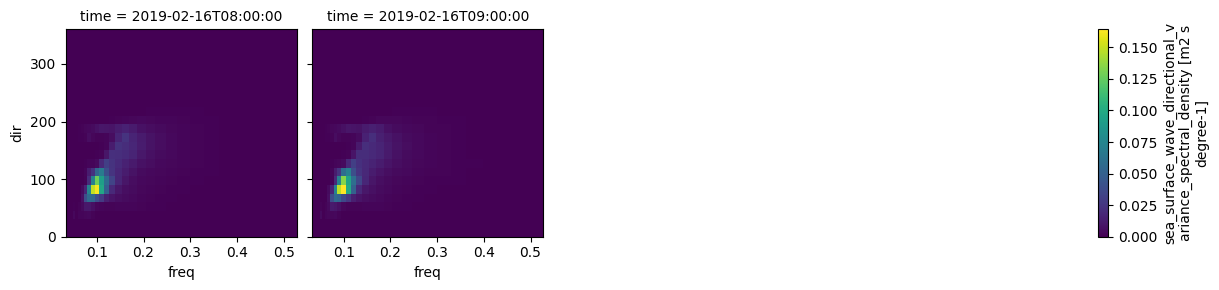

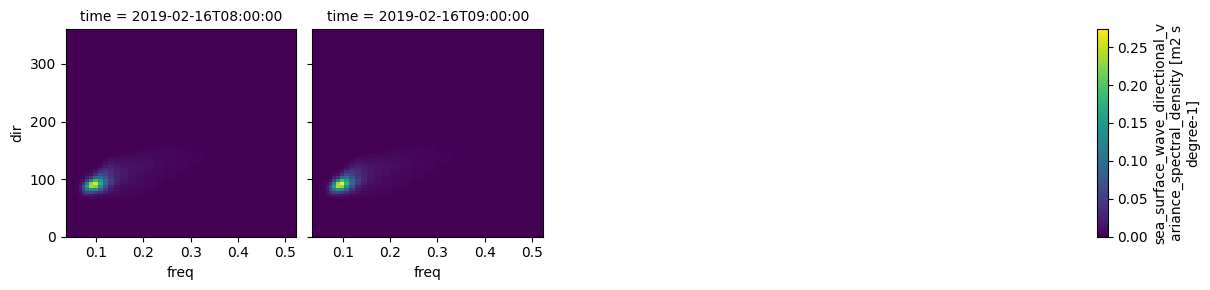

In [ ]:
speccyO.efth.sortby('dir').isel(time=slice(80000, 80002)).plot(x= 'freq', y = 'dir', col = 'time', col_wrap = 4)
speccyI.efth.sortby('dir').isel(time=slice(80000, 80002)).plot(x= 'freq', y = 'dir', col = 'time', col_wrap = 4)

###Save pairs of images to google drive, numbered according to their position in the xarray
* Manually create destination folders and change paths accordingly

In [ ]:
# speccyO.efth.sortby('dir').isel(time=slice(0, 2)).plot(x= 'freq', y = 'dir', col = 'time')
fig = plt.figure()
for i in range(0,43800):    # 43800 samples equals 5 years of data (8760*5)
  # speccyO.efth.sortby('dir').isel(time=i).plot(x='freq', y='dir')
  speccyO_plot = speccyO.efth.sortby('dir').isel(time=i)
  array = np.array(speccyO_plot)
  array_norm = (array-np.min(array))/(np.max(array)-np.min(array)) * 255
  img = Image.fromarray(array_norm.astype(np.uint8))
  img.save('/content/gdrive/MyDrive/WaveSpectra_CAE/data/New/Offshore/'+str(i).zfill(5)+'.jpg')

  speccyI_plot = speccyI.efth.sortby('dir').isel(time=i)
  array = np.array(speccyI_plot)
  array_norm = (array-np.min(array))/(np.max(array)-np.min(array)) * 255
  img = Image.fromarray(array_norm.astype(np.uint8))
  img.save('/content/gdrive/MyDrive/WaveSpectra_CAE/data/New/NearShore/'+str(i).zfill(5)+'.jpg')


###Compress all images to zip folder, and download to local drive
**Skip this step if training on Colab**

In [ ]:
# Change paths
!zip -r /path/to/dataset_name.zip /path/to/dataset/
from google.colab import files
files.download("/content/dataset_name.zip")